In [7]:
import pandas as pd
import geopandas as gpd
from geopandas import points_from_xy
import matplotlib as plt
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

In [8]:
provinces = gpd.read_file("adm1/adm1_map/adm1.shp")

In [9]:
sez = pd.read_csv("aggregated_data/municipalities/sez_aggregated.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hendrixperalta/Desktop/Research Data Manipulation/research_data/aggregated _data/municipalities/sez_aggregated.csv'

In [5]:
filtered_sez = sez[sez['latitude'] != 0]


In [6]:
filtered_sez

,code,name,latitude,longitude,year,close,type,sez_id,origin,inv2000,...,sal_tec2007,sal_tec2008,sal_tec2009,sal_tec2010,sal_tec2011,sal_tec2012,sal_tec2013,sal_tec2014,sal_tec2015,sal_tec2016
1,DOM-6NO,Zona Franca 6 de Noviembre,18.434236,-70.077097,2016.0,0.0,private,1.0,1.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2500.00
2,DOM-ALC,Los Alcarrizos,18.521192,-70.050865,1990.0,0.0,public,2.0,1.0,19853638.95,...,3446.06,2969.16,4073.59,3389.04,3762.00,3197.77,3533.52,3852.34,4420.89,4293.00
3,DOM-ALT,Villa Altagracia,18.687048,-70.180632,1988.0,0.0,private,3.0,1.0,33900000.00,...,3489.29,3026.84,4079.53,2903.04,5212.50,4772.18,4996.25,5007.53,5640.68,5610.00
4,DOM-AND,Andres,18.442336,-69.649780,2009.0,0.0,private,4.0,1.0,0.00,...,0.00,0.00,3514.00,3675.25,3654.00,6025.00,5077.00,7045.37,6936.53,7100.00
5,DOM-ARM,La Armeria,18.421294,-70.117660,1990.0,0.0,public,5.0,1.0,8620740.19,...,1954.00,2551.00,3551.60,3893.25,3359.33,3131.93,4402.00,3956.30,4300.90,4187.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,DOM-VEG,La Vega,19.246732,-70.556490,1987.0,0.0,public,91.0,1.0,45018217.52,...,3836.31,2984.12,3021.27,3190.84,3356.29,3686.81,3737.21,4189.40,4754.71,4671.84
92,DOM-VER,Luperon Verde,19.793250,-70.680905,2019.0,0.0,private,92.0,1.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
93,DOM-VIS,Bella Vista,18.613215,-69.708447,2004.0,0.0,private,93.0,1.0,0.00,...,0.00,4569.00,4615.00,5375.00,4698.00,6863.00,6433.17,7015.64,4450.00,4500.00
94,DOM-YAQ,Parque Industrial y de Servicios Yaque,19.469724,-70.714373,2010.0,0.0,private,94.0,1.0,0.00,...,0.00,0.00,0.00,3439.60,4800.00,3417.45,3807.43,2897.10,3996.96,5841.01


<Axes: xlabel='longitude', ylabel='latitude'>

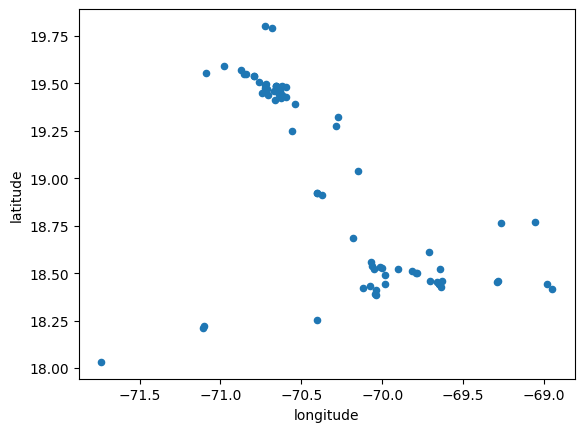

In [7]:
filtered_sez.plot(
    kind='scatter', x="longitude", y="latitude"
)


In [8]:
provinces.crs

<Geographic 2D CRS: GEOGCS["GCS_unknown",DATUM["WGS_1984",SPHEROID["WG ...>
Name: GCS_unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
sez_gdf = gpd.GeoDataFrame(
    filtered_sez, crs = provinces.crs,
    geometry = points_from_xy(
        filtered_sez["longitude"], filtered_sez["latitude"]
    )
)

In [10]:
sez_gdf.isna().sum()

code           0
name           0
latitude       0
longitude      0
year           0
              ..
sal_tec2013    0
sal_tec2014    0
sal_tec2015    0
sal_tec2016    0
geometry       0
Length: 293, dtype: int64

In [11]:
#sez_gdf.to_csv("sez_gdf.csv")

In [12]:
sez_gdf.explore(
    titles = "CartoDB positron",
    cmap = "plasma", 
    style_kwds=dict(color = "black")
)

In [13]:
#%%timeit
joined = gpd.sjoin(
    sez_gdf,
    provinces,
    how="right",
    predicate="within"
)

In [14]:
joined.fillna(0, inplace = True)

In [17]:
agg_func = {col: "sum" for col in joined.columns}
del agg_func['geometry']

In [18]:
joined["id"] = pd.to_numeric(joined["id"], errors = "coerce")

In [19]:
mean_columns = joined.columns[joined.columns.str.contains('sal|id', regex=True)]


In [20]:
for col in mean_columns:
    if col in agg_func:
        agg_func[col] = "mean"

In [21]:
types = joined[joined.columns[joined.columns.str.contains('sal|id')]].dtypes

In [22]:
types.to_csv("types.csv")

In [23]:
res_dissolve = joined.dissolve(by="id", aggfunc=agg_func)

In [24]:
res_dissolve

,geometry,index_left,code,name,latitude,longitude,year,close,type,sez_id,...,sal_tec2011,sal_tec2012,sal_tec2013,sal_tec2014,sal_tec2015,sal_tec2016,id,shapeName,COORD_X,COORD_Y
id,,,,,,,,,,,,,,,,,,,,,
0,"POLYGON ((-71.07707 19.46890, -71.07577 19.467...",1403.0,DOM-CIPDOM-JANDOM-HIPDOM-LEODOM-YAQDOM-JOBDOM-...,Caribbean Industrial Park Ecopark Industrial F...,525.972890,-1908.787525,54172.0,0.0,privateprivateprivateprivateprivateprivatemixp...,51.370370,...,1736.740370,1831.512593,2243.057407,2870.540370,3640.307407,4265.670000,0.0,SantiagoSantiagoSantiagoSantiagoSantiagoSantia...,-1914.306463,521.906598
1,"POLYGON ((-70.25152 19.52238, -70.24888 19.522...",45.0,DOM-FRADOM-CON,San Francisco de Macoris Conacado Industrial P...,38.599110,-140.563750,4003.0,0.0,publicprivate,23.000000,...,1250.000000,1400.000000,4837.500000,4445.170000,4595.720000,4595.740000,1.0,DuarteDuarte,-140.163765,38.518017
2,"POLYGON ((-71.63890 19.23173, -71.63855 19.232...",0.0,0,0,0.000000,0.000000,0.0,0.0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,ElÃ­as PiÃ±a,-71.610730,18.999643
3,"POLYGON ((-69.62430 18.99220, -69.61392 19.036...",33.0,DOM-HAT,Hato Mayor,18.762585,-69.265977,1990.0,0.0,public,34.000000,...,2800.000000,3300.000000,3800.000000,5000.000000,5000.000000,5000.000000,3.0,Hato Mayor,-69.369978,18.864259
4,"POLYGON ((-70.96021 19.04470, -70.96020 19.044...",91.0,DOM-VEG,La Vega,19.246732,-70.556490,1987.0,0.0,public,91.000000,...,3356.290000,3686.810000,3737.210000,4189.400000,4754.710000,4671.840000,4.0,La Vega,-70.631157,19.053890
5,"POLYGON ((-70.28236 19.15639, -70.28237 19.156...",18.0,DOM-COT,Cotui,19.035924,-70.150490,1990.0,2009.0,public,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,SÃ¡nchez RamÃ­rez,-70.138325,19.018593
6,"POLYGON ((-69.73361 19.09517, -69.73361 19.095...",0.0,0,0,0.000000,0.000000,0.0,0.0,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0,SamanÃ¡,-69.483463,19.226249
7,"POLYGON ((-70.88010 19.65221, -70.88014 19.652...",120.0,DOM-ZOFDOM-ESP,Zofinma (Mao)Esperanza,39.147769,-142.070640,3981.0,2006.0,privatepublic,60.500000,...,1656.250000,1850.000000,2218.750000,2442.855000,2612.690000,2510.660000,7.0,ValverdeValverde,-142.083296,39.171324
8,"POLYGON ((-71.42546 18.13789, -71.42501 18.138...",50.0,DOM-INTDOM-BAR,Interexport Free Zone Barahona,36.433366,-142.211878,3999.0,0.0,privatepublic,25.500000,...,3100.000000,3100.000000,6250.000000,6850.000000,3309.500000,3314.500000,8.0,BarahonaBarahona,-142.430798,36.335260


In [28]:
provinces.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         32 non-null     object  
 1   shapeName  32 non-null     object  
 2   COORD_X    32 non-null     float64 
 3   COORD_Y    32 non-null     float64 
 4   geometry   32 non-null     geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 1.4+ KB


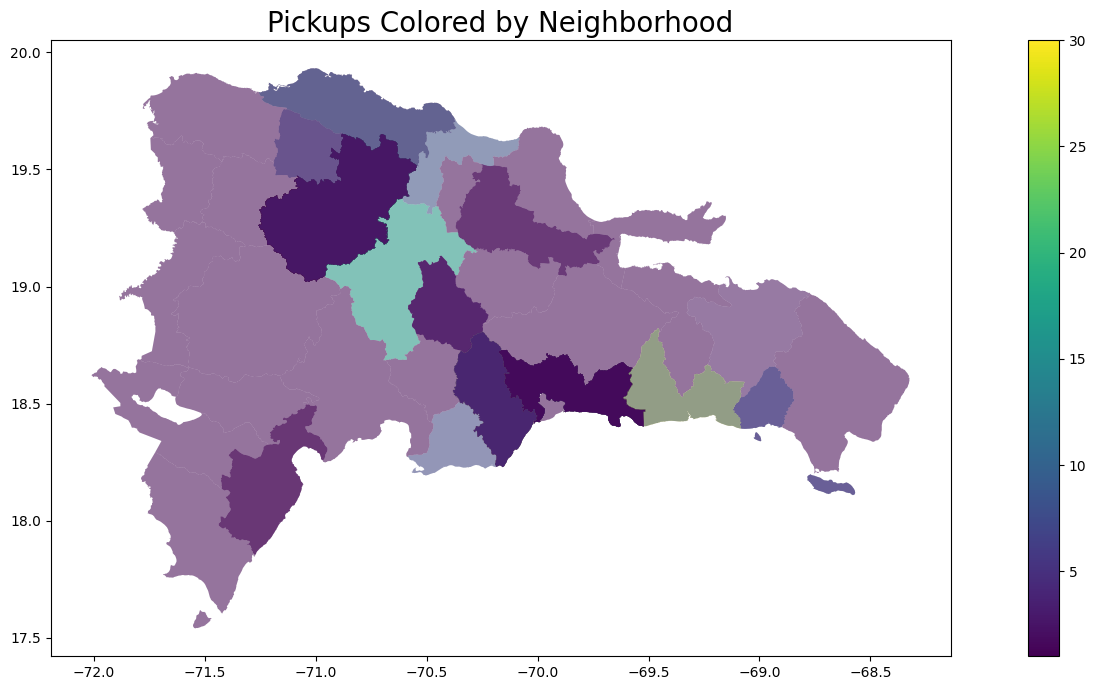

In [29]:
import matplotlib.pyplot as plt

cmap = LinearSegmentedColormap.from_list("custom_blue_red", ["blue", "red"])

fig, ax = plt.subplots(figsize=(20, 8))

joined.plot(ax=ax, color="lightgrey", alpha=0.5)
            
joined.plot(ax=ax, alpha=0.5, markersize=2, column="ent2015", 
            legend=True, vmin=1, vmax=30)
plt.title("Pickups Colored by Neighborhood", fontsize=20);


In [32]:
joined.drop(columns = 'geometry').to_csv("joined.csv", index = False)

In [33]:
res_nogeo = res_dissolve.drop(columns = "geometry")
res_nogeo.to_csv("joined_sez_map.csv", index = False)